In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [21]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [22]:
#using minmax scaler function
#transformation of single column needs "values.reshape(-1,1)"
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
df[['Murder','Assault','UrbanPop','Rape']]=ms.fit_transform(df[['Murder','Assault','UrbanPop','Rape']])

In [23]:
df_norm = df.iloc[:,1:]


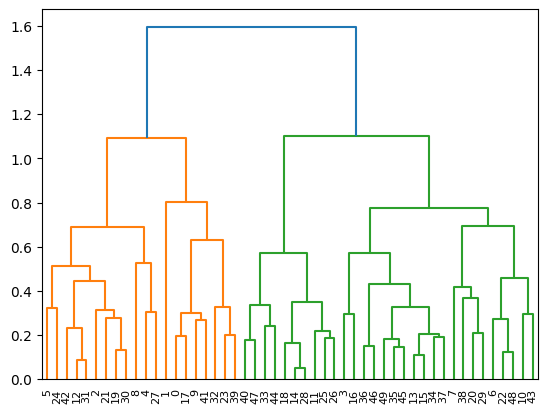

In [24]:
# create dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.show()

In [25]:
# create clusters
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [26]:
hc.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [27]:
yhc = hc.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [28]:
yhc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [29]:
df["Clusters"] = yhc

In [30]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,0.746988,0.654110,0.440678,0.359173,3
1,Alaska,0.554217,0.746575,0.271186,0.961240,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0
4,California,0.493976,0.791096,1.000000,0.860465,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0
8,Florida,0.879518,0.993151,0.813559,0.635659,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3


In [32]:
df1 = df.sort_values("Clusters")

In [34]:
df1[["Murder","Clusters"]]

,Murder,Clusters
49,0.361446,0
20,0.216867,0
29,0.397590,0
16,0.536145,0
15,0.313253,0
34,0.391566,0
13,0.385542,0
35,0.349398,0
22,0.114458,0
10,0.271084,0


In [44]:
df1[["Assault","UrbanPop"]]

,Assault,UrbanPop
49,0.397260,0.474576
20,0.356164,0.898305
29,0.390411,0.966102
16,0.219178,0.338983
15,0.239726,0.576271
34,0.256849,0.728814
13,0.232877,0.559322
35,0.363014,0.610169
22,0.092466,0.576271
10,0.003425,0.864407


In [45]:
df1[["Rape"]]

,Rape
49,0.214470
20,0.232558
29,0.297158
16,0.232558
15,0.276486
34,0.364341
13,0.354005
35,0.328165
22,0.196382
10,0.333333


In [36]:
#kmeans usind=g standarsscaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df[['Murder','Assault','UrbanPop','Rape']]=sc.fit_transform(df[['Murder','Assault','UrbanPop','Rape']])

In [37]:
#find the optimum number of clusters

from sklearn.cluster import KMeans

In [38]:
#inertia calculates the within cluster sum of squares
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.iloc[:,1:])
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [39]:
wcss

[266.02,
 154.17829982423538,
 104.13871462565074,
 62.06320540572037,
 53.109207930759084,
 45.723851469378175,
 42.317215342751396,
 37.27177718192979,
 33.41559193933014,
 30.78533955811944]

<Axes: >

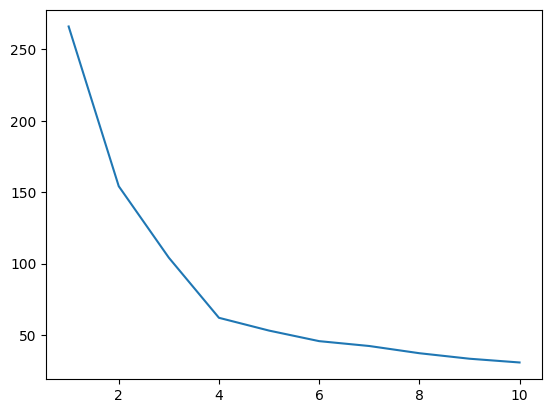

In [40]:
sns.lineplot(x=range(1,11),y=wcss)

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
kmeans = KMeans(n_clusters=4)
predict= kmeans.fit_predict(df.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
predict

array([3, 3, 1, 2, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 2, 3, 0, 1, 2, 1,
       2, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 2, 2], dtype=int32)

In [50]:
#dbscan
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=8)

#nbrs = nn.fit(df1)

#distances,indices = nbrs.kneighbors(df1)

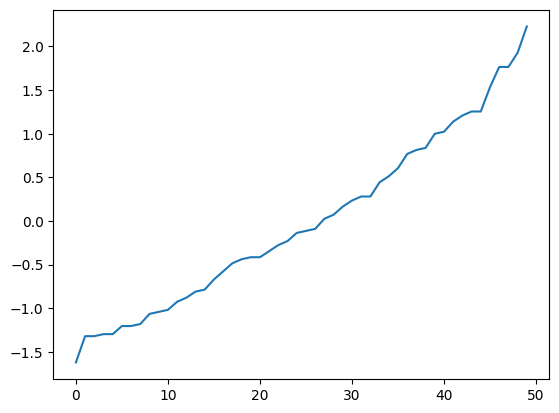

In [52]:
df = np.sort(df,axis=0)
df = df[:,1]
plt.plot(df)

In [53]:
df

array([-1.6206934121320589, -1.3191906308252934, -1.3191906308252934,
       -1.2959981091863113, -1.2959981091863113, -1.2032280226303838,
       -1.2032280226303838, -1.1800355009914016, -1.064072892796492,
       -1.0408803711575103, -1.017687849518528, -0.9249177629626004,
       -0.8785327196846363, -0.8089551547676906, -0.7857626331287084,
       -0.6698000249337988, -0.577029938377871, -0.48425985182194314,
       -0.4378748085439793, -0.41468228690499725, -0.41468228690499725,
       -0.3451047219880514, -0.2755271570711058, -0.22914211379314178,
       -0.13637202723721373, -0.11317950559823191, -0.0899869839592499,
       0.02597562423565998, 0.07236066751362359, 0.16513075406955144,
       0.23470831898649772, 0.2810933622644613, 0.2810933622644613,
       0.4434410137373346, 0.5130185786542805, 0.6057886652102085,
       0.768136316683082, 0.814521359961046, 0.8377138816000278,
       1.0000615330729012, 1.0232540547118831, 1.139216662906793,
       1.208794227823739, 1.255